퍼셉트론 and gate

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def AND_gate(x):
  w1 = 0.5
  w2 = 0.5
  b = -0.7
  result = x[0] * w1 +x[1]*w2+b

#위 는 두개의 데이터로 회귀분석식을 만든 것
 
  if result <= 0:
    return 0
  else:
    return 1


input 만들기

In [3]:
input_data = np.array([[0,0], [0,1], [1,0], [1,1]])

and를 해보자

In [4]:
result_and = []
for x in input_data: #x는 위의 [0,0] 이거 하나씩 가지고 오는 격
  result_and.append(AND_gate(x))
print(result_and)

[0, 0, 0, 1]


결과 [0, 0, 0, 1] and의 결과를 얻음.

nand gate

In [5]:
def NAND_gate(x):
  w1 = -0.5
  w2 = -0.5
  b = 0.7
  result = x[0] * w1 +x[1]*w2+b

#위 는 두개의 데이터로 회귀분석식을 만든 것
 
  if result <= 0:
    return 0
  else:
    return 1

인풋데이터는 똑같이 쓸거야.

In [6]:
input_data1 = np.array([[0,0], [0,1], [1,0], [1,1]])

In [7]:
result_nand = []
for x in input_data1: #x는 위의 [0,0] 이거 하나씩 가지고 오는 격
  result_nand.append(NAND_gate(x))
print(result_nand)

[1, 1, 1, 0]


or gate
지금 WB는 퍼셉트로 과학자들이 찾은 것  우리도 시그모이드로 찾을 수 있어

In [8]:
def OR_gate(x):
  w1 = 0.6
  w2 = 0.6
  b = -0.5
  result = x[0] * w1 +x[1]*w2+b

#위 는 두개의 데이터로 회귀분석식을 만든 것
 
  if result <= 0:
    return 0
  else:
    return 1

In [9]:
input_data2 = np.array([[0,0], [0,1], [1,0], [1,1]])

In [10]:
result_or = []
for x in input_data2: #x는 위의 [0,0] 이거 하나씩 가지고 오는 격
  result_or.append(OR_gate(x))
print(result_or)

[0, 1, 1, 1]


exclusive or
사실 이거 할수가 없어. 못구했거든.
다층퍼셉트론으로 구해야해.

In [11]:
s1 = [] #NAND_gate 결과
s2 = [] #OR_gate 결과

new_input=[] #새로운 input, s1, s2
final_result=[]

for i in range(len(input_data)): #실제 인풋데이터만큼 돈다.
  s1=NAND_gate(input_data[i])
  s2=OR_gate(input_data[i])
  new_input.append(s1)
  new_input.append(s2)
  result = AND_gate(new_input)
  final_result.append(result)
  new_input=[] #비울거야?? 어엉?

print(final_result)

[0, 1, 1, 0]


w와 b값을 알고 있어야하는데, 이걸 자동으로 시켜서.. 시그모이드로!!

다층으로 exclusive or 구현

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


In [13]:
x=torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]])
and_y=torch.FloatTensor([[0], [0], [0],[1]])
nand_y=torch.FloatTensor([[1], [1], [1],[0]])
or_y=torch.FloatTensor([[0], [1], [1],[1]])
xor_y=torch.FloatTensor([[0], [1], [1],[0]])



In [14]:
model=nn.Sequential(
  nn.Linear(2,1, bias=True),
  nn.Sigmoid()
)
#손실함수
criterion = nn.BCELoss() #바이너리크로스엔트로피 약자
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [15]:
for epoch in range(100001):
  optimizer.zero_grad()
  h=model(x)
  cost=criterion(h, and_y) #더해진다구? ㅇㅁㅇ?
  cost.backward()
  optimizer.step()
  
  if epoch%100==0:
    print(f'epoch:{epoch}, cost:{cost.item()}')

epoch:0, cost:0.6763235330581665
epoch:100, cost:0.4774363040924072
epoch:200, cost:0.3719616234302521
epoch:300, cost:0.30756014585494995
epoch:400, cost:0.26364338397979736
epoch:500, cost:0.23137997090816498
epoch:600, cost:0.20645096898078918
epoch:700, cost:0.1864919662475586
epoch:800, cost:0.17008918523788452
epoch:900, cost:0.15633699297904968
epoch:1000, cost:0.14462369680404663
epoch:1100, cost:0.13451795279979706
epoch:1200, cost:0.12570568919181824
epoch:1300, cost:0.11795134842395782
epoch:1400, cost:0.11107449978590012
epoch:1500, cost:0.10493399202823639
epoch:1600, cost:0.09941805154085159
epoch:1700, cost:0.09443653374910355
epoch:1800, cost:0.08991576731204987
epoch:1900, cost:0.08579529821872711
epoch:2000, cost:0.08202467858791351
epoch:2100, cost:0.07856173813343048
epoch:2200, cost:0.07537070661783218
epoch:2300, cost:0.07242121547460556
epoch:2400, cost:0.06968710571527481
epoch:2500, cost:0.06714598834514618
epoch:2600, cost:0.0647783949971199
epoch:2700, cost:0

In [16]:
pred = model(x)
print(pred)
print((pred>0.5).float())

tensor([[1.1569e-08],
        [2.0170e-03],
        [2.0170e-03],
        [9.9718e-01]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.]])


In [17]:
print(list(model.parameters()))

[Parameter containing:
tensor([[12.0708, 12.0708]], requires_grad=True), Parameter containing:
tensor([-18.2749], requires_grad=True)]


학습이 됐으니까.
아래꺼 한번 더 실행


In [18]:
for epoch in range(100001):
  optimizer.zero_grad()
  h=model(x)
  cost=criterion(h, nand_y) #더해진다구? ㅇㅁㅇ?
  cost.backward()
  optimizer.step()
  
  if epoch%100==0:
    print(f'epoch:{epoch}, cost:{cost.item()}')

epoch:0, cost:9.139181137084961
epoch:100, cost:6.845217704772949
epoch:200, cost:5.7299628257751465
epoch:300, cost:4.888296127319336
epoch:400, cost:4.055140495300293
epoch:500, cost:3.2242259979248047
epoch:600, cost:2.4033031463623047
epoch:700, cost:1.629084587097168
epoch:800, cost:1.0091781616210938
epoch:900, cost:0.6426236629486084
epoch:1000, cost:0.46043282747268677
epoch:1100, cost:0.36211779713630676
epoch:1200, cost:0.30109789967536926
epoch:1300, cost:0.25901710987091064
epoch:1400, cost:0.22786912322044373
epoch:1500, cost:0.2036762833595276
epoch:1600, cost:0.18423393368721008
epoch:1700, cost:0.16821038722991943
epoch:1800, cost:0.15474650263786316
epoch:1900, cost:0.14325842261314392
epoch:2000, cost:0.13333240151405334
epoch:2100, cost:0.124666228890419
epoch:2200, cost:0.11703236401081085
epoch:2300, cost:0.11025619506835938
epoch:2400, cost:0.10420086234807968
epoch:2500, cost:0.09875744581222534
epoch:2600, cost:0.0938381552696228
epoch:2700, cost:0.0893713086843

In [19]:
pred = model(x)
print(pred)
print((pred>0.5).float())

tensor([[1.0000],
        [0.9980],
        [0.9980],
        [0.0028]], grad_fn=<SigmoidBackward0>)
tensor([[1.],
        [1.],
        [1.],
        [0.]])


In [20]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-12.0530, -12.0530]], requires_grad=True), Parameter containing:
tensor([18.2478], requires_grad=True)]


or 모델 생성

In [21]:
for epoch in range(100001):
  optimizer.zero_grad()
  h=model(x)
  cost=criterion(h, or_y) #더해진다구? ㅇㅁㅇ?
  cost.backward()
  optimizer.step()
  
  if epoch%100==0:
    print(f'epoch:{epoch}, cost:{cost.item()}')

epoch:0, cost:26.466291427612305
epoch:100, cost:25.137191772460938
epoch:200, cost:25.03231430053711
epoch:300, cost:25.017126083374023
epoch:400, cost:25.011518478393555
epoch:500, cost:25.00864601135254
epoch:600, cost:25.006908416748047
epoch:700, cost:25.0057430267334
epoch:800, cost:25.004913330078125
epoch:900, cost:25.004291534423828
epoch:1000, cost:25.003808975219727
epoch:1100, cost:25.0034236907959
epoch:1200, cost:25.00310707092285
epoch:1300, cost:25.002845764160156
epoch:1400, cost:25.00262451171875
epoch:1500, cost:25.00243377685547
epoch:1600, cost:25.002269744873047
epoch:1700, cost:25.002126693725586
epoch:1800, cost:25.001998901367188
epoch:1900, cost:25.00188636779785
epoch:2000, cost:25.001787185668945
epoch:2100, cost:25.00169563293457
epoch:2200, cost:25.001615524291992
epoch:2300, cost:25.001541137695312
epoch:2400, cost:25.00147247314453
epoch:2500, cost:25.00141143798828
epoch:2600, cost:25.001354217529297
epoch:2700, cost:25.001300811767578
epoch:2800, cost:

In [22]:
pred = model(x)
print(pred)
print((pred>0.5).float())

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [0.9999]], grad_fn=<SigmoidBackward0>)
tensor([[1.],
        [1.],
        [1.],
        [1.]])


In [23]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-7.1271, -7.1271]], requires_grad=True), Parameter containing:
tensor([23.1745], requires_grad=True)]


여기서도 exclusive or 안됨.

In [24]:
for epoch in range(100001):
  optimizer.zero_grad()
  h=model(x)
  cost=criterion(h, xor_y) #더해진다구? ㅇㅁㅇ?
  cost.backward()
  optimizer.step()
  
  if epoch%100==0:
    print(f'epoch:{epoch}, cost:{cost.item()}')

epoch:0, cost:27.2301025390625
epoch:100, cost:25.448625564575195
epoch:200, cost:25.049104690551758
epoch:300, cost:25.02141571044922
epoch:400, cost:25.013490676879883
epoch:500, cost:25.009851455688477
epoch:600, cost:25.007789611816406
epoch:700, cost:25.006465911865234
epoch:800, cost:25.005558013916016
epoch:900, cost:25.00489616394043
epoch:1000, cost:25.004390716552734
epoch:1100, cost:25.003999710083008
epoch:1200, cost:25.003686904907227
epoch:1300, cost:25.003433227539062
epoch:1400, cost:25.003219604492188
epoch:1500, cost:25.003042221069336
epoch:1600, cost:25.002893447875977
epoch:1700, cost:25.002765655517578
epoch:1800, cost:25.002656936645508
epoch:1900, cost:25.002559661865234
epoch:2000, cost:25.002473831176758
epoch:2100, cost:25.002403259277344
epoch:2200, cost:25.002338409423828
epoch:2300, cost:25.002281188964844
epoch:2400, cost:25.002225875854492
epoch:2500, cost:25.002182006835938
epoch:2600, cost:25.002138137817383
epoch:2700, cost:25.002103805541992
epoch:28

cost가 거의 같은 값으로 돌아.

In [25]:
pred = model(x)
print(pred)
print((pred>0.5).float())

tensor([[1.0000],
        [0.9990],
        [0.9990],
        [0.0014]], grad_fn=<SigmoidBackward0>)
tensor([[1.],
        [1.],
        [1.],
        [0.]])


In [26]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-13.4218, -13.4218]], requires_grad=True), Parameter containing:
tensor([20.2971], requires_grad=True)]


원하는 결과가 안나와.
딥러닝을 해결하나본데.. 와 이거 참 ㅇㅁㅇ?

인공신경망 구축

In [27]:
x

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

In [28]:
xor_y

tensor([[0.],
        [1.],
        [1.],
        [0.]])

이 값 그대로해서 쓰신데
모델 만들어보자.

In [29]:
model = nn.Sequential(
  nn.Linear(2,10, bias=True), #입력 2개 출력 10개 바이어스 사용한다!
  nn.Sigmoid(),
  nn.Linear(10,10, bias=True), 
  nn.Sigmoid(),
  nn.Linear(10,10, bias=True), 
  nn.Sigmoid(),
  nn.Linear(10,1, bias=True), #출력은 1개가 되야해.
  nn.Sigmoid()

)

In [30]:
#손실함수
criterion = nn.BCELoss() #바이너리크로스엔트로피 약자
optimizer = optim.SGD(model.parameters(), lr=1) #느슨하게 1

훈련하자!

In [31]:
for epoch in range(100001):
  optimizer.zero_grad()
  h=model(x)
  cost=criterion(h, xor_y) #더해진다구? ㅇㅁㅇ?
  cost.backward()
  optimizer.step()
  
  if epoch%100==0:
    print(f'epoch:{epoch}, cost:{cost.item()}')

epoch:0, cost:0.6937118768692017
epoch:100, cost:0.6931470632553101
epoch:200, cost:0.6931463479995728
epoch:300, cost:0.6931455135345459
epoch:400, cost:0.6931447982788086
epoch:500, cost:0.6931439638137817
epoch:600, cost:0.6931431293487549
epoch:700, cost:0.6931424140930176
epoch:800, cost:0.693141520023346
epoch:900, cost:0.6931406855583191
epoch:1000, cost:0.6931398510932922
epoch:1100, cost:0.6931390166282654
epoch:1200, cost:0.6931381225585938
epoch:1300, cost:0.6931371688842773
epoch:1400, cost:0.6931361556053162
epoch:1500, cost:0.693135142326355
epoch:1600, cost:0.6931341290473938
epoch:1700, cost:0.6931329965591431
epoch:1800, cost:0.6931318044662476
epoch:1900, cost:0.693130612373352
epoch:2000, cost:0.6931293606758118
epoch:2100, cost:0.6931279897689819
epoch:2200, cost:0.6931265592575073
epoch:2300, cost:0.6931250095367432
epoch:2400, cost:0.6931234002113342
epoch:2500, cost:0.6931216716766357
epoch:2600, cost:0.6931197643280029
epoch:2700, cost:0.6931177377700806
epoch:2

cost가 줄기 시작한다. 위에 단층 했을 때는 
epoch:99900, cost:25.000873565673828
epoch:100000, cost:25.000873565673828
결과 cost가 25에서 안줄었는데 다층하니까 줄어든다.

lr을 0.1로 하면 너무 천천히 주니까 참고

예측값 가지고 오자


In [32]:
pred = model(x)
print(pred)
print((pred>0.5).float()) #이진분류라서 0.5임

tensor([[5.5684e-06],
        [9.9999e-01],
        [9.9999e-01],
        [5.2609e-06]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [1.],
        [1.],
        [0.]])


내가 구하고 싶은 값이 나옴.
파라메터를 찍어보자.

In [33]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-5.5599,  5.3043],
        [-4.0787,  4.5329],
        [ 0.8990, -0.7464],
        [-0.8488, -0.1401],
        [-1.0173, -0.4005],
        [-0.3964,  0.7664],
        [ 0.7837, -1.0753],
        [-0.6116,  0.3790],
        [-0.5788, -0.1102],
        [-1.3177, -0.6081]], requires_grad=True), Parameter containing:
tensor([-2.9036,  2.1078, -0.3347,  0.0627, -0.2737, -0.5704, -0.1988, -0.6692,
        -0.2433, -0.3127], requires_grad=True), Parameter containing:
tensor([[ 3.0112e+00, -2.5575e+00,  6.7746e-01, -1.8534e-01,  1.1002e-01,
         -1.9304e-02,  6.5191e-01, -2.6469e-01, -2.0376e-01, -6.5450e-02],
        [-7.4531e-01,  4.7300e-01,  3.8901e-02, -1.0410e-01, -5.5188e-02,
          3.0717e-01, -3.3015e-01,  2.2036e-01, -1.8688e-01, -2.2822e-01],
        [ 2.7240e+00, -2.2013e+00,  8.3186e-01, -2.0162e-01, -2.2298e-01,
         -1.4337e-01,  5.7316e-01, -4.7705e-02,  2.5007e-01, -1.5547e-01],
        [ 9.8436e-01, -1.1205e+00,  3.4556e-01, -4.6270e

층마다 파라메터가 생겼으니까 많아 w가 한두개가 아니라는 거임.
drop을 해서 연결선을 임의로 지울수 있어.
and or는 단층해도 잘나오고 다층하면 더 잘나오겠지.


In [34]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

x=np.arange(-5.0, 5.0, 0.1) # -5에서 5깢 1씩 증가하면서

x
y=sigmoid(x)
y


array([0.00669285, 0.00739154, 0.00816257, 0.0090133 , 0.0099518 ,
       0.01098694, 0.01212843, 0.01338692, 0.01477403, 0.0163025 ,
       0.01798621, 0.01984031, 0.02188127, 0.02412702, 0.02659699,
       0.02931223, 0.03229546, 0.03557119, 0.03916572, 0.04310725,
       0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
       0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153,
       0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.91682

차트 그려보자.


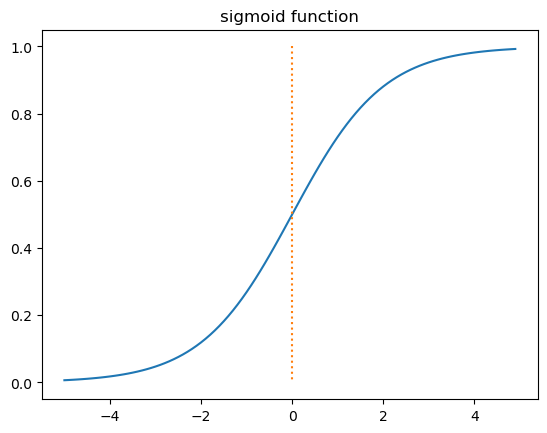

In [35]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #커널 죽을때
plt.plot(x,y)
plt.plot([0,0], [1.0, 0.0], ":")
plt.title('sigmoid function')
plt.show()

w를 업데이트하고 기울기를 앞으로 보낼때 0.001을 앞으로 전파해줘. 어느순간 0이된다.
머신러닝 단이 깊을때는 기울기가 0이되니가 w가 업데이트가 안돼.

선형은 여러계층으로 쌓을 수 없고, 비선형으로 해야지 쌓을 수 있어.
시그모이드를 은닉층에 쓰다보면 w와 b를 역전파에 의해 계산을 하는데 뒤에 곱해지는 아주 작은 수들이 앞으로 전파되면서 계속 곱해질건데 기울이 값이 너무 작아지면, 0에 가까운 수로 가까운수로 곱해지면 역전파를 할 수 없어서 w를 업데이트 할 수 없어.

하이퍼볼릭탄젠트 함수 도입

In [36]:
y=np.tanh(x)
print(y)

[-9.99909204e-01 -9.99889103e-01 -9.99864552e-01 -9.99834566e-01
 -9.99797942e-01 -9.99753211e-01 -9.99698579e-01 -9.99631856e-01
 -9.99550366e-01 -9.99450844e-01 -9.99329300e-01 -9.99180866e-01
 -9.98999598e-01 -9.98778241e-01 -9.98507942e-01 -9.98177898e-01
 -9.97774928e-01 -9.97282960e-01 -9.96682398e-01 -9.95949359e-01
 -9.95054754e-01 -9.93963167e-01 -9.92631520e-01 -9.91007454e-01
 -9.89027402e-01 -9.86614298e-01 -9.83674858e-01 -9.80096396e-01
 -9.75743130e-01 -9.70451937e-01 -9.64027580e-01 -9.56237458e-01
 -9.46806013e-01 -9.35409071e-01 -9.21668554e-01 -9.05148254e-01
 -8.85351648e-01 -8.61723159e-01 -8.33654607e-01 -8.00499022e-01
 -7.61594156e-01 -7.16297870e-01 -6.64036770e-01 -6.04367777e-01
 -5.37049567e-01 -4.62117157e-01 -3.79948962e-01 -2.91312612e-01
 -1.97375320e-01 -9.96679946e-02 -1.77635684e-14  9.96679946e-02
  1.97375320e-01  2.91312612e-01  3.79948962e-01  4.62117157e-01
  5.37049567e-01  6.04367777e-01  6.64036770e-01  7.16297870e-01
  7.61594156e-01  8.00499

차트를 그려보자


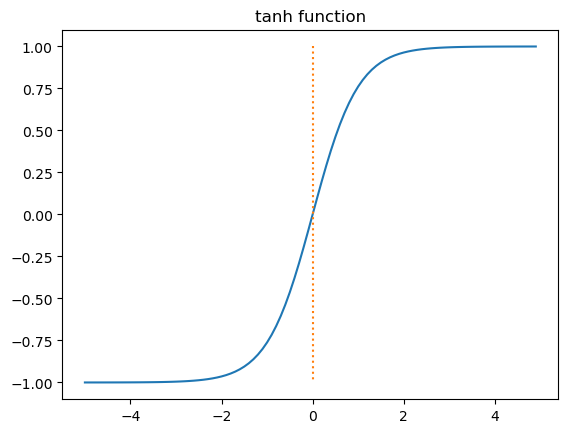

In [37]:
plt.plot(x,y)
plt.plot([0,0], [1.0, -1.0], ":")
plt.title('tanh function')
plt.show()

렐루함수

In [39]:
def relu(x):
  return np.maximum(0,x)

y=relu(x)
y

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1,
       0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

-값은 0이되고 플러스만 살아남았어.

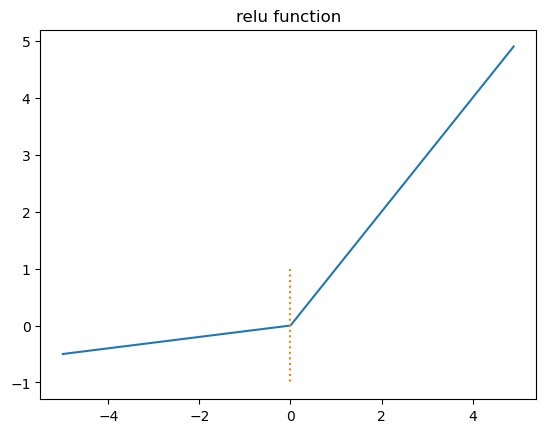

In [45]:
plt.plot(x,y)
plt.plot([0,0], [1.0, -1.0], ":")
plt.title('relu function')
plt.show()

리키렐루

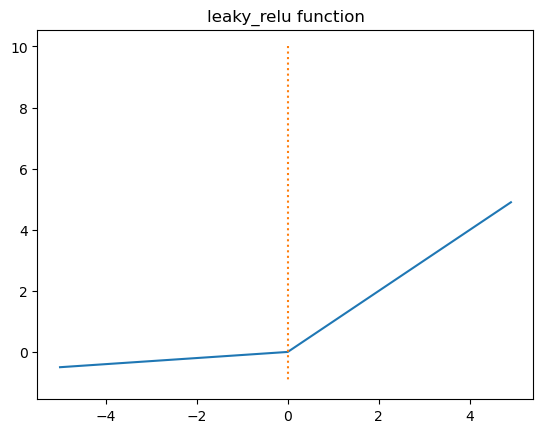

In [ ]:
a=0.1
def leaky_relu(x):
  return np.maximum(a*x, x) #a값을 줘서 x의 값을 임의적으로 줄여???

y=leaky_relu(x)

plt.plot(x,y)
plt.plot([0,0], [10.0, -1.0], ":")
plt.title('leaky_relu function')
plt.show()


소프트 맥스 함수도 비활성화의 함수중 하나인데
계산을 하다보면 2차원 그래프가 나옴.
